# Worksheet 12

Name: Themistoklis Nikas

UID: U91062110 

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

It is a classificaiton task. We can denote that they are getting a job with 1 and that they aren't with 0.

It is not a classification task as there might be infinite number of months in order to be offered a job.

It is a multilabel classification task.

It is not a classification task.

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

We can randomly split the given dataset into two sub datasets, train and test. We will train our model on train dataset and test it on test respectively.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting is like having a model that's too simple and doesn't understand the data well. It performs poorly on both training and test data and the error is high in both.

Overfitting is having a model that's too complicated. It actually memorizes the training data. Therefore, it does great on training data but fails on test data. We would expect low training error but high errors on new data, i.e., test data.

### K Nearest Neighbors

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

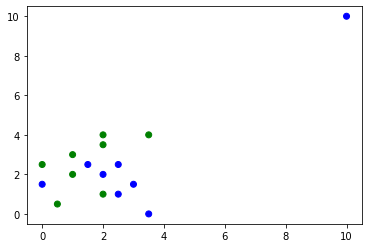

In [4]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

From the scatter plot above it is evident that the point on the top right corner is outlier. We will remove that (it is the lasst point in the nd array).

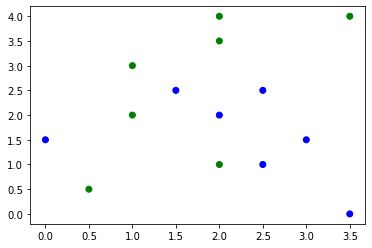

In [8]:
# remove top rigth point from ndarray
data['Attribute A'] = np.delete(data['Attribute A'], -1)
data['Attribute B'] = np.delete(data['Attribute B'], -1)
data['Class'] = np.delete(data['Class'], -1)
#plot again
plt.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

There are many ways to approach this question. However, blue point at (0, 1.5) definitely is a noise point and should have been assigned to the green class. Now, green point at (2, 1) also seems to be a noise point. Most likely, blue point at (1.5, 2.5) is also a noise point.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

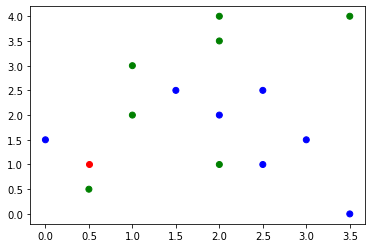

In [12]:
plt.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
plt.scatter(0.5, 1, color='r')
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

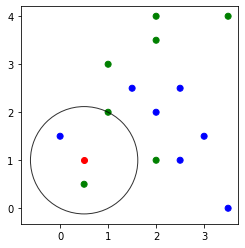

In [20]:
def n_closest_to(example, n):
    distances = np.sqrt((data['Attribute A'] - example[0])**2 + (data['Attribute B'] - example[1])**2)
    return np.argsort(distances)[:n]

location = ( 0.5 , 1 )
closest_points = n_closest_to(location, 3)
radius = np.sqrt((data['Attribute A'][closest_points[2]] - location[0])**2 + (data['Attribute B'][closest_points[2]] - location[1])**2)
_, axes = plt.subplots()
axes.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
axes.scatter(location[0], location[1], color='r')
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [21]:
def majority(points):
    return 1 if np.sum(data['Class'][points]) > len(points) / 2 else 0
print(majority(closest_points))

1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [24]:
count = 0
for i in range(len(data["Class"])):
    actual_class = data["Class"][i]
    training_set = np.delete(np.arange(len(data["Class"])), i)
    prediction = majority(n_closest_to((data["Attribute A"][i], data["Attribute B"][i]), 3))
    if prediction == actual_class:
        count += 1

print("overall accuracy = ", count / len(data["Class"]))

overall accuracy =  0.7857142857142857


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)
#split the data into training and testing sets with 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
training_accuracies = []
testing_accuracies = []
for k in tqdm(range(1, 21)):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    training_accuracies.append(knn.score(X_train, y_train))
    testing_accuracies.append(knn.score(X_test, y_test))
plt.xticks(range(1, 21))
plt.xlabel("k")
plt.ylabel("accuracy")
plt.plot(range(1, 21), training_accuracies, label="training")
plt.plot(range(1, 21), testing_accuracies, label="testing")
plt.legend()
plt.show()

  0%|          | 0/20 [00:03<?, ?it/s]


KeyboardInterrupt: 

100%|██████████| 20/20 [46:52<00:00, 140.63s/it]


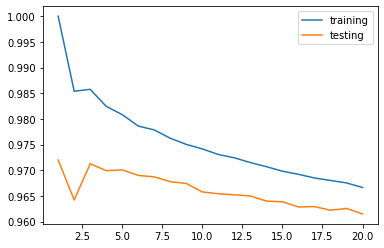

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
training_accuracies = []
testing_accuracies = []
for k in tqdm(range(1, 21)):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    training_accuracies.append(knn.score(X_train, y_train))
    testing_accuracies.append(knn.score(X_test, y_test))
plt.xticks(range(1, 21))
plt.xlabel("k")
plt.ylabel("accuracy")
plt.plot(range(1, 21), training_accuracies, label="training")
plt.plot(range(1, 21), testing_accuracies, label="testing")
plt.legend()
plt.show()

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

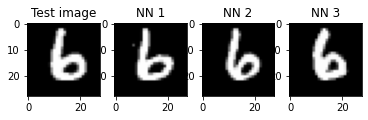

In [11]:
index = np.random.choice(X_test.shape[0])
image = X_test[index]
plt.subplot(1, 4, 1)
plt.imshow(image.reshape(28, 28), cmap="gray")
plt.title("Test image")
for i in range(3):
    plt.subplot(1, 4, i + 2)
    plt.imshow(X_train[knn.kneighbors([image], 3, return_distance=False)[0][i]].reshape(28, 28), cmap="gray")
    plt.title(f"NN {i + 1}")
plt.show()

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

dimensionality_reduction = PCA(n_components=50) # this is the number of components that we kept at Worksheet10
knn_model = KNeighborsClassifier(n_neighbors=3)

training_accuracies = []
testing_accuracies = []
for k in tqdm(range(1, 21)):
    model = make_pipeline(dimensionality_reduction, KNeighborsClassifier(n_neighbors=k))
    model.fit(X_train, y_train)
    training_accuracies.append(model.score(X_train, y_train))
    testing_accuracies.append(model.score(X_test, y_test))
plt.xticks(range(1, 21))
plt.xlabel("k")
plt.ylabel("accuracy")
plt.plot(range(1, 21), training_accuracies, label="training")
plt.plot(range(1, 21), testing_accuracies, label="testing")
plt.legend()
plt.show()

#model = make_pipeline(dimensionality_reduction, knn_model)
#model.fit(...)

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below